In [2]:
import pandas as pd
import numpy as np

In [3]:
from classes.vqa_model_predictor import VqaModelPredictor, DefaultVqaModelPredictor
from common.DAL import get_models_data_frame, get_model
from evaluate.VqaMedEvaluatorBase import VqaMedEvaluatorBase
from common.functions import get_highlighted_function_code
import vqa_logger 


Using TensorFlow backend.


In [4]:
df_models = get_models_data_frame()
try:
    df_show = df_models.sort_values(by=['wbss', 'bleu'], ascending=False).head()
except KeyError: #if no scode yet
    df_show = df_models
    df_show['wbss'] = np.nan
    df_show['bleu'] = np.nan

    
df_show.tail()

,wbss,bleu,model_id,models,accuracy,recall_val,val_accuracy,precsision,class_strategy,id,...,history_location,activation,f1_score,image_base_net,notes,f1_score_val,loss,recall,val_loss,model_scores
0,0.253658,0.344659,1.0,"Model(id=1,\n\tmodel_location=C:\Users\Public\...",0.169138,0.232202,0.2040,0.285938,None,1,...,C:\Users\Public\Documents\Data\2019\models\201...,tanh,None,vgg19,First 2019 model,None,-0.264820,0.189848,-0.285407,"[ModelScore(model_id=1, bleu=0.344658670979377..."
1,NaN,NaN,NaN,NaN,0.171093,0.229424,0.1905,0.145030,None,2,...,C:\Users\Public\Documents\Data\2019\models\201...,tanh,None,vgg19,First model with 65k params,None,-0.264334,NaN,-0.281248,[]


In [5]:
import logging
import  vqa_logger 
logger = logging.getLogger(__name__)
import IPython


In [6]:
model_id = 2#int(model_id)
mp = DefaultVqaModelPredictor(model_id)
mp

[2019-02-19 22:01:38][DEBUG] Getting model #2 (First model with 65k params)
[2019-02-19 22:01:43][DEBUG] Loading Model: 0:00:04.379990
[2019-02-19 22:01:43][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-19 22:01:43][DEBUG] loading parquet from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-19 22:01:43][DEBUG] Loading parquet: 0:00:00.000220
[2019-02-19 22:01:43][WARNING] No data found for test set
[2019-02-19 22:01:43][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-19 22:01:43][DEBUG] loading parquet from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-19 22:01:43][DEBUG] Loading parquet: 0:00:00.534923
[2019-02-19 22:01:43][DEBUG] Converting to pandas: 0:00:00.008808


In [7]:
mp.df_validation.head(2)

,image_name,question,answer,path,processed_question,processed_answer,diagnosis,question_category,answer_embedding,question_embedding,group
12792,synpic54733.jpg,what imaging modality was used to take this im...,ct with iv contrast,C:\Users\Public\Documents\Data\2019\validation...,imaging modality used take image?,ct iv contrast,,Modality,"[0.9566164016723633, 1.1977665424346924, 0.992...","[-0.38250797986984253, 2.5355920791625977, -1....",validation
12793,synpic25647.jpg,what kind of scan is this?,xr - plain film,C:\Users\Public\Documents\Data\2019\validation...,kind scan this?,xr - plain film,,Modality,"[2.1364431381225586, 0.8484694957733154, -0.96...","[-0.01856657862663269, 0.7099074125289917, -1....",validation


In [8]:
code = get_highlighted_function_code(mp.predict,remove_comments=False)
IPython.display.display(code)

In [9]:
df_data = mp.df_validation
df_predictions = mp.predict(mp.df_validation)
df_predictions.head()

[2019-02-19 22:05:56][DEBUG] Raw model prediction: 0:03:47.051659


,answer,image_name,question,prediction,probabilities,path
index,,,,,,
12792,ct with iv contrast,synpic54733.jpg,what imaging modality was used to take this im...,yes neck axial skull contents,"[(0.277), (0.241), (0.968), (0.434), (0.425)]",C:\Users\Public\Documents\Data\2019\validation...
12793,xr - plain film,synpic25647.jpg,what kind of scan is this?,film plain pleura lateral musculoskeletal,"[(0.424), (0.423), (0.259), (0.132), (0.116)]",C:\Users\Public\Documents\Data\2019\validation...
12794,no,synpic35681.jpg,was the mri taken with contrast?,yes axial skull contents sagittal,"[(0.112), (0.207), (0.139), (0.180), (0.122)]",C:\Users\Public\Documents\Data\2019\validation...
12795,t2,synpic39641.jpg,"is this a t1 weighted, t2 weighted, or flair i...",yes axial sagittal musculoskeletal gastrointes...,"[(0.109), (0.466), (0.190), (0.323), (0.171)]",C:\Users\Public\Documents\Data\2019\validation...
12796,yes,synpic35693.jpg,is this a noncontrast mri?,yes spine contents sagittal musculoskeletal,"[(0.152), (0.172), (0.198), (0.380), (0.152)]",C:\Users\Public\Documents\Data\2019\validation...


In [10]:
df_predictions.describe()

,answer,image_name,question,prediction,probabilities,path
count,2000,2000,2000,2000,2000,2000
unique,470,500,186,149,500,500
top,axial,synpic52430.jpg,what abnormality is seen in the image?,yes skull coronal contents sagittal,"[(0.188), (0.119), (0.132), (0.337), (0.138)]",C:\Users\Public\Documents\Data\2019\validation...
freq,213,4,133,124,4,4


In [41]:

image_name = df_predictions.image_name.sample(1).values[0]

df_image = df_predictions[df_predictions.image_name == image_name]
# print(f'Result: {set(df_image.prediction)}')

image_path = df_image.path.values[0]
df_image

,answer,image_name,question,prediction,probabilities,path
index,,,,,,
12796,yes,synpic35693.jpg,is this a noncontrast mri?,yes spine contents sagittal musculoskeletal,"[(0.152), (0.172), (0.198), (0.380), (0.152)]",C:\Users\Public\Documents\Data\2019\validation...
13296,sagittal,synpic35693.jpg,in what plane is this mri taken?,yes spine contents sagittal musculoskeletal,"[(0.152), (0.172), (0.198), (0.380), (0.152)]",C:\Users\Public\Documents\Data\2019\validation...
13796,heart and great vessels,synpic35693.jpg,what is the organ principally shown in this mri?,yes spine contents sagittal musculoskeletal,"[(0.152), (0.172), (0.198), (0.380), (0.152)]",C:\Users\Public\Documents\Data\2019\validation...
14296,yes,synpic35693.jpg,is this a normal mri?,yes spine contents sagittal musculoskeletal,"[(0.152), (0.172), (0.198), (0.380), (0.152)]",C:\Users\Public\Documents\Data\2019\validation...


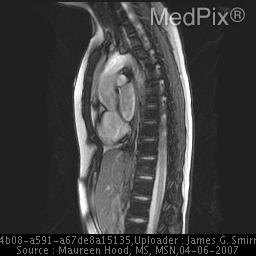

In [42]:
from IPython.display import Image
Image(filename = image_path, width=400, height=400)

## Evaluating the Model

In [39]:
validation_prediction = df_predictions
predictions = validation_prediction.prediction.values
ground_truth = validation_prediction.answer.values
results = VqaMedEvaluatorBase.get_all_evaluation(predictions=predictions, ground_truth=ground_truth)
print(f'Got results of\n{results}')

Got results of
{'bleu': 0.328238898126765, 'wbss': 0.2434346603445816}
